In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
import keras
from tensorflow.keras import Sequential
import os
import numpy as np
import pandas as pd

In [17]:
# Get all labels
names = []
for dir in os.listdir("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/mediapipe/reformatting-the-data/data_25_labels"):
    if dir !=  '.DS_Store':
        names.append(dir)
names

['research',
 'hear',
 'music',
 'brother',
 'ocean',
 'many',
 'i love you',
 'dog',
 'polite',
 'milk',
 'bookstore',
 'doctor',
 'i',
 'classroom',
 'focus',
 'money',
 'coffee',
 'book',
 'phone',
 'chicken',
 'photographer',
 'hamburger',
 'good morning',
 'open',
 'door']

In [18]:
import glob

train_df = pd.DataFrame()
test_df = pd.DataFrame()
i = 0
for label in names:
    files = glob.glob(f"/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/mediapipe/reformatting-the-data/data_25_labels/{label}/*.csv")
    for f in files:
        csv = pd.read_csv(f)
        if i%5 != 0:    
            train_df = pd.concat([train_df, csv])
        else:
            test_df = pd.concat([test_df, csv])
        i += 1
        

print(train_df.shape, test_df.shape)

(39216, 301) (9075, 301)


In [19]:
def seperate_label(df):
    df_features = df.copy()

    df_labels = df_features.pop("class")

    df_features = np.array(df_features)
    # df_labels = np.array(df_labels)
    print(df_features.shape)
    print(df_labels.shape, type(df_labels))
    return df_features, df_labels

In [20]:
X_train, Y_train = seperate_label(train_df)

(39216, 300)
(39216,) <class 'pandas.core.series.Series'>


In [21]:
X_val, Y_val = seperate_label(test_df)

(9075, 300)
(9075,) <class 'pandas.core.series.Series'>


In [22]:
dicti = {names[i]: i for i in range(len(names))}
dicti

{'research': 0,
 'hear': 1,
 'music': 2,
 'brother': 3,
 'ocean': 4,
 'many': 5,
 'i love you': 6,
 'dog': 7,
 'polite': 8,
 'milk': 9,
 'bookstore': 10,
 'doctor': 11,
 'i': 12,
 'classroom': 13,
 'focus': 14,
 'money': 15,
 'coffee': 16,
 'book': 17,
 'phone': 18,
 'chicken': 19,
 'photographer': 20,
 'hamburger': 21,
 'good morning': 22,
 'open': 23,
 'door': 24}

In [23]:
def reformat_label(df_labels):    
#should be between 0 and 3
    # for element in df_labels:
    #     element = dicti[element]

    def change_label(x):
        return dicti[x]

    df_labels = df_labels.apply(change_label)
    df_labels.head()
    return df_labels

Y_train = reformat_label(Y_train)
Y_val = reformat_label(Y_val)

In [24]:
Y_train, Y_val

(0      0
 1      0
 2      0
 3      0
 4      0
       ..
 62    24
 63    24
 64    24
 65    24
 66    24
 Name: class, Length: 39216, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 46    24
 47    24
 48    24
 49    24
 50    24
 Name: class, Length: 9075, dtype: int64)

In [25]:
#I have to make each label a single vector 
# I can just rotate (transpose, since now I have a single rolumn, I will make it into many rows)! 
Y_train = np.array([Y_train]).T
Y_val = np.array([Y_val]).T
print(Y_train.shape, Y_val.shape)

(39216, 1) (9075, 1)


In [26]:
from sklearn.utils import shuffle

X_train,Y_train = shuffle(X_train, Y_train, random_state=0)
X_val,Y_val = shuffle(X_val, Y_val, random_state=0)
X_train, Y_train

(array([[ 0.49409083,  0.22459967, -0.46296376, ...,  0.62952131,
         -0.06377199,  0.        ],
        [ 0.53372836,  0.24738221, -1.24606872, ...,  0.84430248,
         -0.03153894,  0.        ],
        [ 0.54129398,  0.34693047, -0.77963328, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.50832802,  0.17890085, -0.45956349, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.54415578,  0.32913452, -0.70783639, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.46577254,  0.38902622, -0.84562027, ...,  0.91197234,
         -0.02871764,  0.        ]]),
 array([[21],
        [16],
        [ 6],
        ...,
        [18],
        [13],
        [ 3]]))

In [37]:
model = Sequential([
    Dense(units=256, activation='relu'),
    Dense(units=200, activation='relu',
          kernel_regularizer=keras.regularizers.l1_l2(0.01)),
    Dense(units=200, activation='relu',
          kernel_regularizer=keras.regularizers.l2(0.01)),
    Dense(units=25, activation='softmax')
])

In [38]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/mediapipe/Simple-Dense-Layers/regularized-25-labels.{epoch:02d}-{val_accuracy:.2f}",
    monitor='val_accuracy',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
)

In [39]:
#cost function
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(), metrics=["accuracy"])

In [40]:
history = model.fit(X_train,Y_train, epochs=20, batch_size=50, validation_data=(X_val, Y_val), callbacks=[checkpoint])

Epoch 1/20
  7/785 [..............................] - ETA: 6s - loss: 34.9275 - accuracy: 0.0771      

2023-03-26 01:15:54.245887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


783/785 [============================>.] - ETA: 0s - loss: 4.7208 - accuracy: 0.1543

2023-03-26 01:16:00.229717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/mediapipe/Simple-Dense-Layers/regularized-25-labels.01-0.14/assets
785/785 [==============================] - 8s 9ms/step - loss: 4.7177 - accuracy: 0.1545 - val_loss: 3.0104 - val_accuracy: 0.1424
Epoch 2/20
785/785 [==============================] - 7s 9ms/step - loss: 2.7328 - accuracy: 0.2037 - val_loss: 2.9734 - val_accuracy: 0.1755
Epoch 3/20
785/785 [==============================] - 7s 9ms/step - loss: 2.6072 - accuracy: 0.2507 - val_loss: 2.9523 - val_accuracy: 0.1888
Epoch 4/20
785/785 [==============================] - 7s 9ms/step - loss: 2.5006 - accuracy: 0.2897 - val_loss: 2.8706 - val_accuracy: 0.2256
Epoch 5/20
785/785 [==============================] - 6s 8ms/step - loss: 2.4418 - accuracy: 0.3105 - val_loss: 2.8571 - val_accuracy: 0.2132
Epoch 6/20
785/785 [==============================] - 6s 8ms/step - loss: 2.3988 - accuracy: 0.3312 - val_loss: 2.

In [ ]:
model.save("saved_model_25_labels")

INFO:tensorflow:Assets written to: saved_model_25_labels/assets


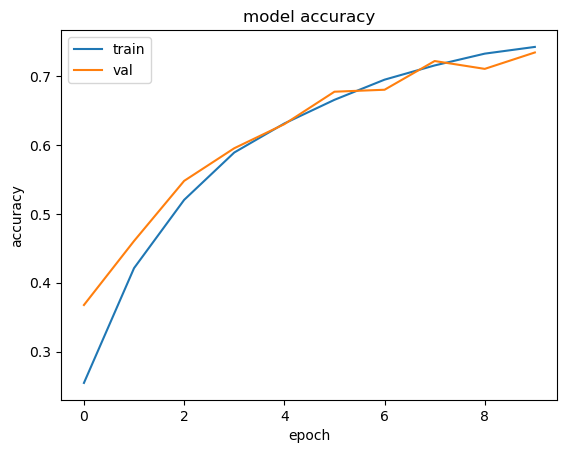

In [28]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('accuracy_25_labels.png')
plt.show()

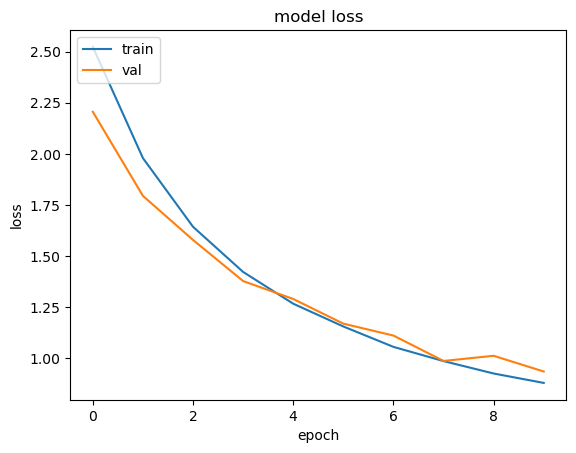

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('loss_25_labels.png')
plt.show()
